# Method

In [ ]:
!pip install activeSVC

In [1]:
import numpy as np
import time
import random
import os

from sklearn.preprocessing import normalize 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib import gridspec

from activeSVC import min_complexity, min_acquisition
import pandas as pd
import pickle
import os, psutil
import resource


def text_create(path, name, msg):
    full_path = path + "/" + name + '.pickle'
    f=open(full_path,'wb') 
    pickle.dump(msg,f)
    f.close()

class TimerError(Exception):
     """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Total run time: {elapsed_time:0.4f} seconds")
        return elapsed_time
        




# Load Data

In [ ]:
import urllib.request
import shutil

try:
    os.mkdir('data')
except OSError:
    print ("Creation of the directory %s failed" % 'data')
else:
    print ("Successfully created the directory %s " % 'data')
    
with urllib.request.urlopen("https://caltech.box.com/shared/static/p2bjcw4ym5ow22yc5h2ld4d7m5wzrw8t.pickle") as response, open('./data/tabula.pickle', "wb") as out_file:
    shutil.copyfileobj(response, out_file)


In [2]:
import pickle
with open('./data/tabula.pickle','rb') as handle:
    raw_data = pickle.load(handle)
    gene=np.array(pickle.load(handle))
    target=np.array(pickle.load(handle))


data=normalize(np.transpose(raw_data),axis=1, norm='l2')

del raw_data

idx = np.arange(np.shape(data)[0])
random.shuffle(idx)
X_train = data[idx[:int(np.shape(data)[0]*4/5)],:]
y_train = target[idx[:int(np.shape(data)[0]*4/5)]]
X_test = data[idx[int(np.shape(data)[0]*4/5):],:]
y_test = target[idx[int(np.shape(data)[0]*4/5):]]

print(np.shape(data),np.shape(target),len(np.unique(target)))
print(np.shape(X_train))
print(np.shape(X_test))

/var/folders/r0/dbvfjmts3w92sv4jkxnkbd740000gn/T/ipykernel_4533/1408983056.py:3: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  raw_data = pickle.load(handle)


(55656, 8661) (55656,) 58
(44524, 8661)
(11132, 8661)


# Select Genes and Save Results

In [ ]:
'''
min-complexity random 150 genes 20 cells
Sometimes it shows ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0
This is because of the settings of algorithm. 
Please set a larger num_samples and init_samples and then re-run this cell. 
Or set parameter class_weight='balanced' and balance=True and then re-run the cell. 
'''
num_features = 150
num_samples=20
init_samples=20
balance=False

path='results/random_150genes_20cells'

try:
    os.mkdir('results')
except OSError:
    print ("Creation of the directory %s failed" % 'results')
else:
    print ("Successfully created the directory %s " % 'results')
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
    
    
if __name__ == '__main__':

    t=Timer()
    t.start()
    feature_selected, num_samples_list, train_errors,test_errors,train_scores,test_scores, step_times= min_complexity(
        X_train,y_train,X_test,y_test,num_features=num_features,num_samples=num_samples,init_samples=init_samples, balance=balance)
    elapsed_time=t.stop()
    
    memorys=[]
    memorys.append(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2)
    memorys.append(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/ 1024 ** 2)
    
    text_create(path,'feature_selected',feature_selected)
    text_create(path,'error',train_errors+test_errors)
    text_create(path,'accuracy',train_scores+test_scores)
    text_create(path,'num_samples_list',num_samples_list)
    text_create(path,'genes_name',gene[feature_selected])
    text_create(path,'elapsed_time',elapsed_time)
    text_create(path,'memory',memorys)

    plt.figure(figsize=(8,8))
    plt.plot(train_scores,linewidth=2)
    plt.plot(test_scores,linewidth=2)
    plt.legend(['train acc','test acc'],prop = {'size':18})
    plt.xlabel('number of genes',fontdict={'weight':'normal','size': 18})
    plt.ylabel('accuracy',fontdict={'weight':'normal','size': 18})
    plt.tick_params(labelsize=18)
    plt.savefig(path+'/acc.pdf', bbox_inches="tight")

feature1=np.copy(feature_selected)

In [ ]:
'''
min-complexity balance 150 genes 20 cells
Sometimes it shows ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0
This is because of the settings of algorithm. 
Please set a larger num_samples and init_samples and then re-run this cell. 
Or set parameter class_weight='balanced' and balance=True and then re-run the cell. 
'''
num_features = 150
num_samples=20
init_samples=20
balance=True

path='results/balance_150genes_20cells'

try:
    os.mkdir('results')
except OSError:
    print ("Creation of the directory %s failed" % 'results')
else:
    print ("Successfully created the directory %s " % 'results')
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
    
    
if __name__ == '__main__':

    t=Timer()
    t.start()
    feature_selected, num_samples_list, train_errors,test_errors,train_scores,test_scores, step_times= min_complexity(
        X_train,y_train,X_test,y_test,num_features=num_features,num_samples=num_samples,init_samples=init_samples, balance=balance)
    elapsed_time=t.stop()
    
    memorys=[]
    memorys.append(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2)
    memorys.append(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/ 1024 ** 2)
    
    text_create(path,'feature_selected',feature_selected)
    text_create(path,'error',train_errors+test_errors)
    text_create(path,'accuracy',train_scores+test_scores)
    text_create(path,'num_samples_list',num_samples_list)
    text_create(path,'genes_name',gene[feature_selected])
    text_create(path,'elapsed_time',elapsed_time)
    text_create(path,'memory',memorys)

    plt.figure(figsize=(8,8))
    plt.plot(train_scores,linewidth=2)
    plt.plot(test_scores,linewidth=2)
    plt.legend(['train acc','test acc'],prop = {'size':18})
    plt.xlabel('number of genes',fontdict={'weight':'normal','size': 18})
    plt.ylabel('accuracy',fontdict={'weight':'normal','size': 18})
    plt.tick_params(labelsize=18)
    plt.savefig(path+'/acc.pdf', bbox_inches="tight")

feature2=np.copy(feature_selected)    


In [ ]:
'''
min-cell 500 genes 200 cells
Sometimes it shows ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0
This is because of the settings of algorithm. 
Please set a larger num_samples and init_samples and then re-run this cell. 
Or set parameter class_weight='balanced' and balance=True and then re-run the cell. 
'''
num_features = 500
num_samples=200
init_samples=200
balance=False

path='results/mincell_500genes_200cells'

try:
    os.mkdir('results')
except OSError:
    print ("Creation of the directory %s failed" % 'results')
else:
    print ("Successfully created the directory %s " % 'results')
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
    
    
if __name__ == '__main__':

    t=Timer()
    t.start()
    feature_selected, num_samples_list, samples_global, train_errors,test_errors,train_scores,test_scores,step_times= min_acquisition(
        X_train,y_train,X_test,y_test,num_features=num_features,num_samples=num_samples, init_samples=init_samples)
    elapsed_time=t.stop()
    
    memorys=[]
    memorys.append(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2)
    memorys.append(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/ 1024 ** 2)
    
    text_create(path,'feature_selected',feature_selected)
    text_create(path,'error',train_errors+test_errors)
    text_create(path,'accuracy',train_scores+test_scores)
    text_create(path,'num_samples_list',num_samples_list)
    text_create(path,'samples_global',samples_global)
    text_create(path,'genes_name',gene[feature_selected])
    text_create(path,'elapsed_time',elapsed_time)
    text_create(path,'memory',memorys)

    plt.figure(figsize=(8,8))
    plt.plot(train_scores,linewidth=2)
    plt.plot(test_scores,linewidth=2)
    plt.legend(['train acc','test acc'],prop = {'size':18})
    plt.xlabel('number of genes',fontdict={'weight':'normal','size': 18})
    plt.ylabel('accuracy',fontdict={'weight':'normal','size': 18})
    plt.tick_params(labelsize=18)
    plt.savefig(path+'/acc.pdf', bbox_inches="tight")

    plt.figure(figsize=(8,5))
    plt.plot(num_samples_list,linewidth=5)
    plt.xlabel('number of genes',fontdict={'weight':'normal','size': 18})
    plt.ylabel('number of cells acquired',fontdict={'weight':'normal','size': 18})
    plt.tick_params(labelsize=18)
    plt.savefig(path+'/cells.pdf', bbox_inches="tight")
    
feature3=np.copy(feature_selected) 
    

# Plots

In [3]:
alpha = 100
data_show = np.log1p(data*alpha).toarray()

In [8]:
classes=[39,14,46,0,21,51,7,44,9,28,29,45,13,27,50,22,41,52]
keys=['B cell','T cell','mesenchymal cell','keratinocyte','basal cell of epidermis', 'macrophage','kidney PST epithelial cell', 'hepatocyte','granulocyte','natural killer cell','immature T cell','alveolar macrophage', 'bladder cell','antigen presenting cell','stromal cell','endothelial cell','mesenchymal stem cell','bladder urothelial cell']

idx=list([])
labels=np.copy(target)
for i in range(len(classes)):
    tmp=list(np.where(target==classes[i])[0])
    labels[tmp]=i+1
    idx =idx+ tmp
others=list(set(range(np.shape(data_show)[0])).difference(set(idx)))
labels[others]=-1


In [4]:
path='/Users/xqchen/Desktop/final_figures/figure4/figure4b'

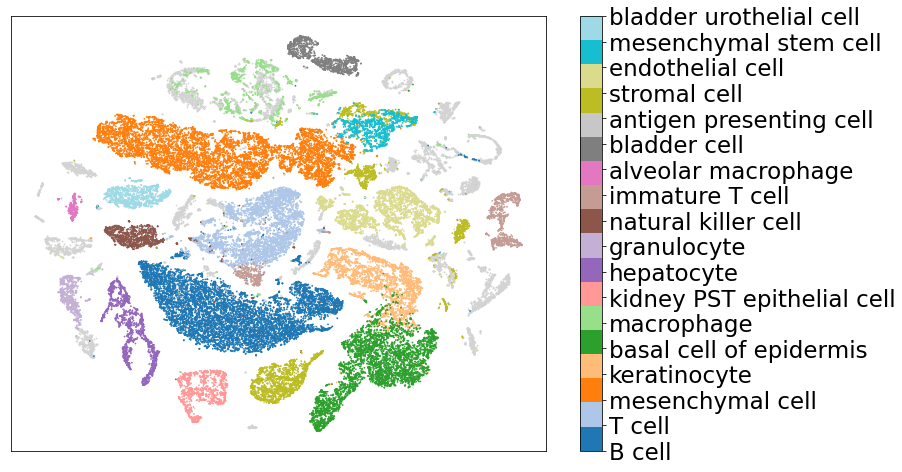

In [9]:
p='/Users/xqchen/Desktop/codes/datasets/tabula/plots/figure4b/'
with open(p+'/tsne.pickle','rb') as handle:
    Y=pickle.load(handle)
plt.figure(figsize=(12,8))

c_cmap = plt.get_cmap('tab20', len(classes))
plt.scatter(Y[others,0], Y[others,1], c='lightgray', s= 0.5) # plot all cells as background
plt.scatter(Y[idx,0], Y[idx,1], c=labels[idx], s=0.5,cmap=c_cmap) # plot subpopulation cells on top
cbar=plt.colorbar(ticks=np.arange(1,len(classes)+1))
plt.xticks([])
plt.yticks([])
cbar.ax.set_yticklabels(keys,fontdict={'weight':'normal','size': 23})
plt.savefig(path+'/tsne.pdf',bbox_inches="tight")

In [ ]:
# tsne of original dataset
pca=PCA(n_components=40,
       copy=True,
       whiten=True,
       svd_solver='auto',
       tol=0.0,
       iterated_power='auto',
       random_state=None)
pcaproj=pca.fit_transform(data_show)

Y=TSNE(n_components=2).fit_transform(pcaproj)

plt.figure(figsize=(12,8))

c_cmap = plt.get_cmap('tab20', len(classes))
plt.scatter(Y[others,0], Y[others,1], c='lightgray', s= 0.5) # plot all cells as background
plt.scatter(Y[idx,0], Y[idx,1], c=labels[idx], s=0.5,cmap=c_cmap) # plot subpopulation cells on top
cbar=plt.colorbar(ticks=np.arange(1,len(classes)+1))
plt.xticks([])
plt.yticks([])
cbar.ax.set_yticklabels(keys,fontdict={'weight':'normal','size': 23})
plt.savefig(path+'/tsne.pdf',bbox_inches="tight")
import pickle
f=open(path+'/tsne.pickle','wb') 
pickle.dump(Y,f)
f.close()


In [ ]:
# tsne of selected genes
data_selected=data_show[:,feature_selected]

pca=PCA(n_components=40,
       copy=True,
       whiten=True,
       svd_solver='auto',
       tol=0.0,
       iterated_power='auto',
       random_state=None)
pcaproj=pca.fit_transform(data_selected)

Y_selected=TSNE(n_components=2).fit_transform(pcaproj)

plt.figure(figsize=(12,8))

c_cmap = plt.get_cmap('tab20', len(classes))
plt.scatter(Y_selected[others,0], Y_selected[others,1], c='lightgray', s= 0.01) # plot all cells as background
plt.scatter(Y_selected[idx,0], Y_selected[idx,1], c=labels[idx], s=0.5,cmap=c_cmap) # plot subpopulation cells on top
cbar=plt.colorbar(ticks=np.arange(1,len(classes)+1))
plt.xticks([])
plt.yticks([])
cbar.ax.set_yticklabels(keys,fontdict={'weight':'normal','size': 23})
plt.savefig(path+'/tsne_selected.pdf',bbox_inches="tight")
import pickle
f=open(path+'/tsne_selected.pickle','wb') 
pickle.dump(Y_selected,f)
f.close()

In [ ]:
# gene expression on tsne projection
features=list(set(feature1)|set(feature2)|set(feature3))
size=len(features)
plt.figure(figsize=(30,3*int(size/10)+3))
gs = gridspec.GridSpec(int(size/10)+1, 10, width_ratios=[7,7,7,7,7,7,7,7,7,7])

for i in range(size):
    f=features[i]
    ax0 = plt.subplot(gs[i])
    ax0.set_title(gene[f],fontdict={'weight':'normal','size': 18})
    plt.scatter(Y[:,0],Y[:,1],c=data_show[:,f],s=0.001)
    ax0.set_xticks([])
    ax0.set_yticks([])
plt.savefig(path+'/gene.png',dpi=300,  bbox_inches="tight")    